<a href="https://colab.research.google.com/github/opmuyes/opmuyes/blob/main/FuzzyGA_Group3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy
import pandas as pd

In [ ]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.membership as mf
import matplotlib.pyplot as plt

In [ ]:
excel_file = 'IC.xlsx'
IC = pd.read_excel(excel_file)

In [ ]:
IC=IC.drop('Patient ID',axis=1).drop('Sex',axis=1).drop('Heart Rate',axis=1).drop('Family History',axis=1).drop('Alcohol Consumption',axis=1).drop('Exercise Hours Per Week',axis=1).drop('Diet',axis=1).drop('Previous Heart Problems',axis=1).drop('Medication Use',axis=1).drop('Stress Level',axis=1).drop('Sedentary Hours Per Day',axis=1).drop('Income',axis=1).drop('Triglycerides',axis=1).drop('Physical Activity Days Per Week',axis=1)
IC=IC.drop('Sleep Hours Per Day',axis=1).drop('Country',axis=1).drop('Continent',axis=1).drop('Hemisphere',axis=1).drop('Obesity',axis=1)





In [ ]:
IC[['Systolic','Dystolic']]=IC['BloodPressure'].str.split('/',expand=True).astype('float64')
IC

,Age,Cholesterol,BloodPressure,Diabetes,Smoking,BMI,HeartAttackRisk,Systolic,Dystolic
0,67,208,158/88,0,1,31.251233,0,158.0,88.0
1,21,389,165/93,1,1,27.194973,0,165.0,93.0
2,21,324,174/99,1,0,28.176571,0,174.0,99.0
3,84,383,163/100,1,1,36.464704,0,163.0,100.0
4,66,318,91/88,1,1,21.809144,0,91.0,88.0
...,...,...,...,...,...,...,...,...,...
8758,60,121,94/76,1,1,19.655895,0,94.0,76.0
8759,28,120,157/102,1,0,23.993866,0,157.0,102.0
8760,47,250,161/75,0,1,35.406146,1,161.0,75.0
8761,36,178,119/67,1,1,27.294020,0,119.0,67.0


In [ ]:
# IC.iloc[0]
print(type(IC.iloc[0].HeartAttackRisk))

<class 'numpy.int64'>


In [ ]:
# a = 0

# 760=0
# while 760 <8764:
  # Variables

  x_age = np.arange(0, 101, 1)
  x_bloodPressure = np.arange(0, 221, 1)
  x_cholesterol = np.arange(100, 251, 1)
  x_bmi = np.arange(0, 40, 0.1)
  x_smoking = np.linspace(0, 1, 101)
  x_diabetes = np.linspace(0, 1, 101)
  y_risk = np.linspace(0, 1, 101)

  # print("\n\n------------------------------------WELCOME-----------------------------------------\n\n")
  # print("Enter Health Data for Calculation of Risk of Heart Disease with Fuzzy Logic...\n\n")

  # input_age = int(input("Age: "))
  # input_bloodPressure = int(input("Blood Pressure: "))
  # input_cholesterol = int(input("Cholesterol: "))
  # input_bmi = float(input("BMI: "))
  # input_smoking = int(input("Smoking(Yes:1/No:0): "))
  # input_diabetes = int(input("Diabetes(Yes:1/No:0): "))

  input_age = int(IC.iloc[760].Age)
  input_bloodPressure = float(IC.iloc[760].Systolic)
  input_cholesterol = int(IC.iloc[760].Cholesterol)
  input_bmi = float(IC.iloc[760].BMI)
  input_smoking = int(IC.iloc[760].Smoking)
  input_diabetes = int(IC.iloc[760].Diabetes)

  # Membership Functions
  # Age
  age_young = mf.trapmf(x_age, [-30, -5, 30, 40])
  age_mid = mf.trapmf(x_age, [30, 40, 50, 60])
  age_old = mf.trapmf(x_age, [50, 60, 100, 100])
  # Blood Pressure
  bloodPressure_low = mf.trapmf(x_bloodPressure, [-30, -5, 100, 120])
  bloodPressure_mid = mf.trapmf(x_bloodPressure, [100, 120, 140, 160])
  bloodPressure_high = mf.trapmf(x_bloodPressure, [140, 160, 180, 200])
  bloodPressure_veryHigh = mf.trapmf(x_bloodPressure, [180, 200, 220, 220])
  #Cholestrol
  cholesterol_low = mf.trapmf(x_cholesterol, [-30, -5, 160, 180])
  cholesterol_mid = mf.trapmf(x_cholesterol, [160, 180, 200, 220])
  cholesterol_high = mf.trapmf(x_cholesterol, [200, 220, 240, 260])
  cholesterol_veryHigh = mf.trapmf(x_cholesterol, [240, 260, 280, 280])
  # BMI
  bmi_underweight= mf.trimf(x_bmi, [14, 18, 22,])
  bmi_normal= mf.trimf(x_bmi, [18, 22, 26,])
  bmi_overweight= mf.trimf(x_bmi, [22, 26, 30,])
  bmi_obese= mf.trapmf(x_bmi, [26, 30, 40, 40])
  # Smoking
  smoking_true = mf.trimf(x_smoking, [0, 1, 1])
  # smoking_false = mf.trimf(x_smoking, [0,0,0.5])
  # Diabetes
  diabetes_true =mf.trimf(x_diabetes, [0, 1, 1])
  # diabetes_false = mf.trimf(x_diabetes, [0,0,0.5])
  #Output
  risk_true = mf.trimf(y_risk, [0.5, 1, 1])
  risk_false = mf.trimf(y_risk, [0,0,0.5])

  # Chart
  # fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows = 7, figsize =(10, 25))

  # ax0.plot(x_age, age_young, 'r', linewidth = 2, label = 'Young')
  # ax0.plot(x_age, age_mid, 'g', linewidth = 2, label = 'Middle')
  # ax0.plot(x_age, age_old, 'b', linewidth = 2, label = 'Old')
  # ax0.set_title('Age')
  # ax0.legend()

  # ax1.plot(x_bloodPressure, bloodPressure_low, 'r', linewidth = 2, label = 'Low')
  # ax1.plot(x_bloodPressure, bloodPressure_mid, 'g', linewidth = 2, label = 'Middle')
  # ax1.plot(x_bloodPressure, bloodPressure_high, 'b', linewidth = 2, label = 'High')
  # ax1.plot(x_bloodPressure, bloodPressure_veryHigh, 'y', linewidth = 2, label = 'Very High')
  # ax1.set_title('Blood Pressure')
  # ax1.legend()

  # ax2.plot(x_cholesterol, cholesterol_low, 'r', linewidth = 2, label = 'Low')
  # ax2.plot(x_cholesterol, cholesterol_mid, 'g', linewidth = 2, label = 'Middle')
  # ax2.plot(x_cholesterol, cholesterol_high, 'b', linewidth = 2, label = 'High')
  # ax2.plot(x_cholesterol, cholesterol_high, 'y', linewidth = 2, label = 'Very High')
  # ax2.set_title('Colestrol')
  # ax2.legend()

  # ax3.plot(x_bmi, bmi_underweight, 'r', linewidth = 2, label = 'Underweight')
  # ax3.plot(x_bmi, bmi_normal, 'g', linewidth = 2, label = 'Normal')
  # ax3.plot(x_bmi, bmi_overweight, 'b', linewidth = 2, label = 'Overweight')
  # ax3.plot(x_bmi, bmi_obese, 'y', linewidth = 2, label = 'Obese')
  # ax3.set_title('Body Mass Index')
  # ax3.legend()

  # ax4.plot(x_smoking, smoking_true, 'g', linewidth = 2, label = 'True')
  # # ax4.plot(x_smoking, smoking_false, 'r', linewidth = 2, label = 'False')
  # ax4.set_title('Smoke')
  # ax4.legend()

  # ax5.plot(x_diabetes, diabetes_true, 'g', linewidth = 2, label = 'True')
  # # ax5.plot(x_diabetes, diabetes_false, 'r', linewidth = 2, label = 'False')
  # ax5.set_title('Diabetes')
  # ax5.legend()

  # ax6.plot(y_risk, risk_true, 'g', linewidth = 2, label = 'High')
  # ax6.plot(y_risk, risk_false, 'r', linewidth = 2, label = 'Low')
  # ax6.set_title('Risk')
  # ax6.legend()

  # plt.tight_layout()

  # Membership Degree
  #Age
  age_fit_young = fuzz.interp_membership(x_age, age_young, input_age)
  age_fit_mid = fuzz.interp_membership(x_age, age_mid, input_age)
  age_fit_old = fuzz.interp_membership(x_age, age_old, input_age)
  #BloodPressure
  bloodPressure_fit_low = fuzz.interp_membership(x_bloodPressure, bloodPressure_low, input_bloodPressure)
  bloodPressure_fit_mid = fuzz.interp_membership(x_bloodPressure, bloodPressure_mid, input_bloodPressure)
  bloodPressure_fit_high = fuzz.interp_membership(x_bloodPressure,bloodPressure_high , input_bloodPressure)
  bloodPressure_fit_veryHigh = fuzz.interp_membership(x_bloodPressure, bloodPressure_veryHigh, input_bloodPressure)
  #Cholestrol
  cholesterol_fit_low = fuzz.interp_membership(x_cholesterol, cholesterol_low, input_cholesterol)
  cholesterol_fit_mid = fuzz.interp_membership(x_cholesterol, cholesterol_mid, input_cholesterol)
  cholesterol_fit_high = fuzz.interp_membership(x_cholesterol, cholesterol_high, input_cholesterol)
  cholesterol_fit_veryHigh = fuzz.interp_membership(x_cholesterol, cholesterol_veryHigh, input_cholesterol)
  #BMI
  bmi_fit_underweight = fuzz.interp_membership(x_bmi, bmi_underweight, input_bmi)
  bmi_fit_normal = fuzz.interp_membership(x_bmi, bmi_normal, input_bmi)
  bmi_fit_overweight = fuzz.interp_membership(x_bmi,bmi_overweight , input_bmi)
  bmi_fit_obese = fuzz.interp_membership(x_bmi, bmi_obese, input_bmi)
  #Smoke
  smoking_fit_true = fuzz.interp_membership(x_smoking, smoking_true, input_smoking)
  # smoking_fit_false = fuzz.interp_membership(x_smoking, smoking_false, input_smoking)
  #Diabetes
  diabetes_fit_true = fuzz.interp_membership(x_diabetes, diabetes_true, input_diabetes)
  # diabetes_fit_false = fuzz.interp_membership(x_diabetes, diabetes_false, input_diabetes)

  # RULES

  rule1 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young, bloodPressure_fit_low),cholesterol_fit_high),bmi_fit_normal),
  smoking_fit_true), risk_false)
  rule2 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_mid, bloodPressure_fit_mid),cholesterol_fit_mid),bmi_fit_underweight),
  smoking_fit_true),diabetes_fit_true), risk_true)
  rule3 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_old, bloodPressure_fit_veryHigh),cholesterol_fit_low),bmi_fit_overweight),
  smoking_fit_false), diabetes_fit_true), risk_true)
  rule4 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young, bloodPressure_fit_high),cholesterol_fit_veryHigh),bmi_fit_obese),
  smoking_fit_false), diabetes_fit_true), risk_true)
  rule5 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_mid, bloodPressure_fit_low),cholesterol_fit_high),bmi_fit_normal),
  smoking_fit_true),diabetes_fit_false), risk_false)
  rule6 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_old, bloodPressure_fit_mid),cholesterol_fit_low),bmi_fit_overweight),
  smoking_fit_false), diabetes_fit_false), risk_true)
  rule7 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young, bloodPressure_fit_veryHigh),cholesterol_fit_mid),bmi_fit_normal),
  smoking_fit_true), diabetes_fit_true), risk_true)
  rule8 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_mid, bloodPressure_fit_low),cholesterol_fit_veryHigh),bmi_fit_underweight),
  smoking_fit_false), diabetes_fit_false), risk_false)
  rule9 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_old, bloodPressure_fit_mid),cholesterol_fit_high),bmi_fit_obese),
  smoking_fit_false), diabetes_fit_true), risk_true)
  rule10 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young, bloodPressure_fit_high),cholesterol_fit_low),bmi_fit_overweight),
  smoking_fit_true), diabetes_fit_true), risk_true)
  rule11 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_mid, bloodPressure_fit_low),cholesterol_fit_high),bmi_fit_normal),
  smoking_fit_false), diabetes_fit_true), risk_false)
  rule12 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_old, bloodPressure_fit_veryHigh),cholesterol_fit_mid),bmi_fit_obese),
  smoking_fit_false), diabetes_fit_true), risk_true)
  rule13 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young, bloodPressure_fit_mid),cholesterol_fit_veryHigh),bmi_fit_underweight),
  smoking_fit_true), diabetes_fit_false), risk_false)
  rule14 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_mid, bloodPressure_fit_high),cholesterol_fit_low),bmi_fit_normal),
  smoking_fit_true), diabetes_fit_false), risk_false)
  rule15 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_old, bloodPressure_fit_low),cholesterol_fit_high),bmi_fit_overweight),
  smoking_fit_false), diabetes_fit_false), risk_true)
  rule16 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young, bloodPressure_fit_low),cholesterol_fit_low),bmi_fit_obese),
  smoking_fit_false), diabetes_fit_true), risk_true)
  rule17 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_mid, bloodPressure_fit_mid),cholesterol_fit_high),bmi_fit_normal),
  smoking_fit_false), diabetes_fit_true), risk_true)
  rule18 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_old, bloodPressure_fit_veryHigh),cholesterol_fit_veryHigh),bmi_fit_overweight),
  smoking_fit_false), diabetes_fit_false), risk_true)
  rule19 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young, bloodPressure_fit_high),cholesterol_fit_mid),bmi_fit_underweight),
  smoking_fit_true), diabetes_fit_true), risk_true)
  rule20 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_mid, bloodPressure_fit_low),cholesterol_fit_low),bmi_fit_normal),
  smoking_fit_false),diabetes_fit_false), risk_false)
  rule21 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_old, bloodPressure_fit_mid),cholesterol_fit_high),bmi_fit_overweight),
  smoking_fit_false), diabetes_fit_true), risk_true)
  rule22 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young, bloodPressure_fit_veryHigh),cholesterol_fit_veryHigh),bmi_fit_obese),
  smoking_fit_true), diabetes_fit_true), risk_true)
  rule23 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_mid, bloodPressure_fit_low),cholesterol_fit_mid),bmi_fit_underweight),
  smoking_fit_true), diabetes_fit_false), risk_false)
  rule24 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_old, bloodPressure_fit_high),cholesterol_fit_low),bmi_fit_normal),
  smoking_fit_false), diabetes_fit_true), risk_false)
  # Combination sets > Mamdani

  out_true = np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(rule2,rule3),rule4),rule6),rule7),rule9),rule10),rule12),rule15),rule16),rule17),rule18),rule19),rule21),rule22)
  out_false = np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(rule1,rule5),rule8),rule11),rule13),rule14),rule20),rule23),rule24)

  # Chart
  # risk0 = np.zeros_like(y_risk)

  # fig, ax0 = plt.subplots(figsize = (7, 4))
  # ax0.fill_between(y_risk, risk0, out_false, facecolor = 'r', alpha = 0.7)
  # ax0.plot(y_risk, risk_false, 'r', linestyle = '--')
  # ax0.fill_between(y_risk, risk0, out_true, facecolor = 'g', alpha = 0.7)
  # ax0.plot(y_risk, risk_true, 'g', linestyle = '--')
  # ax0.set_title('Out of the Risk')

  # plt.tight_layout()

  # CoA

  out_risk = np.fmax(out_true, out_false)
  defuzzified  = fuzz.defuzz(y_risk, out_risk, 'centroid')

  result = fuzz.interp_membership(y_risk, out_risk, defuzzified)

  if defuzzified >= 0.5:
    value=1

  else :
    value=0

    if value == int(IC.iloc[760].HeartAttackRisk):
      a += 1

    # 760 +=1
  # print("Heart Risk Attack:", defuzzified*100, "percent")

  # Chart

  # fig, ax0 = plt.subplots(figsize=(7, 4))

  # ax0.plot(y_risk, risk_true, 'y', linewidth = 0.5, linestyle = '--')
  # ax0.plot(y_risk, risk_false, 'm', linewidth = 0.5, linestyle = '--')

  # ax0.fill_between(y_risk, risk0, out_risk, facecolor = 'Orange', alpha = 0.7)
  # ax0.plot([defuzzified , defuzzified], [0, result], 'k', linewidth = 1.5, alpha = 0.9)
  # ax0.set_title('Centroid Deffuzification')

  # plt.tight_layout()

# float precision = (a/8764)*100
# print(precision)



IndentationError: unexpected indent (<ipython-input-129-a5e6c5e4dd2d>, line 7)



------------------------------------WELCOME-----------------------------------------


Enter Health Data for Calculation of Risk of Heart Disease with Fuzzy Logic...


Age: 30
Blood Pressure: 100
Cholesterol: 100
BMI: 30
Smoking(Yes:1/No:0): 1
Diabetes(Yes:1/No:0): 1


AssertionError: Total area is zero in defuzzification!

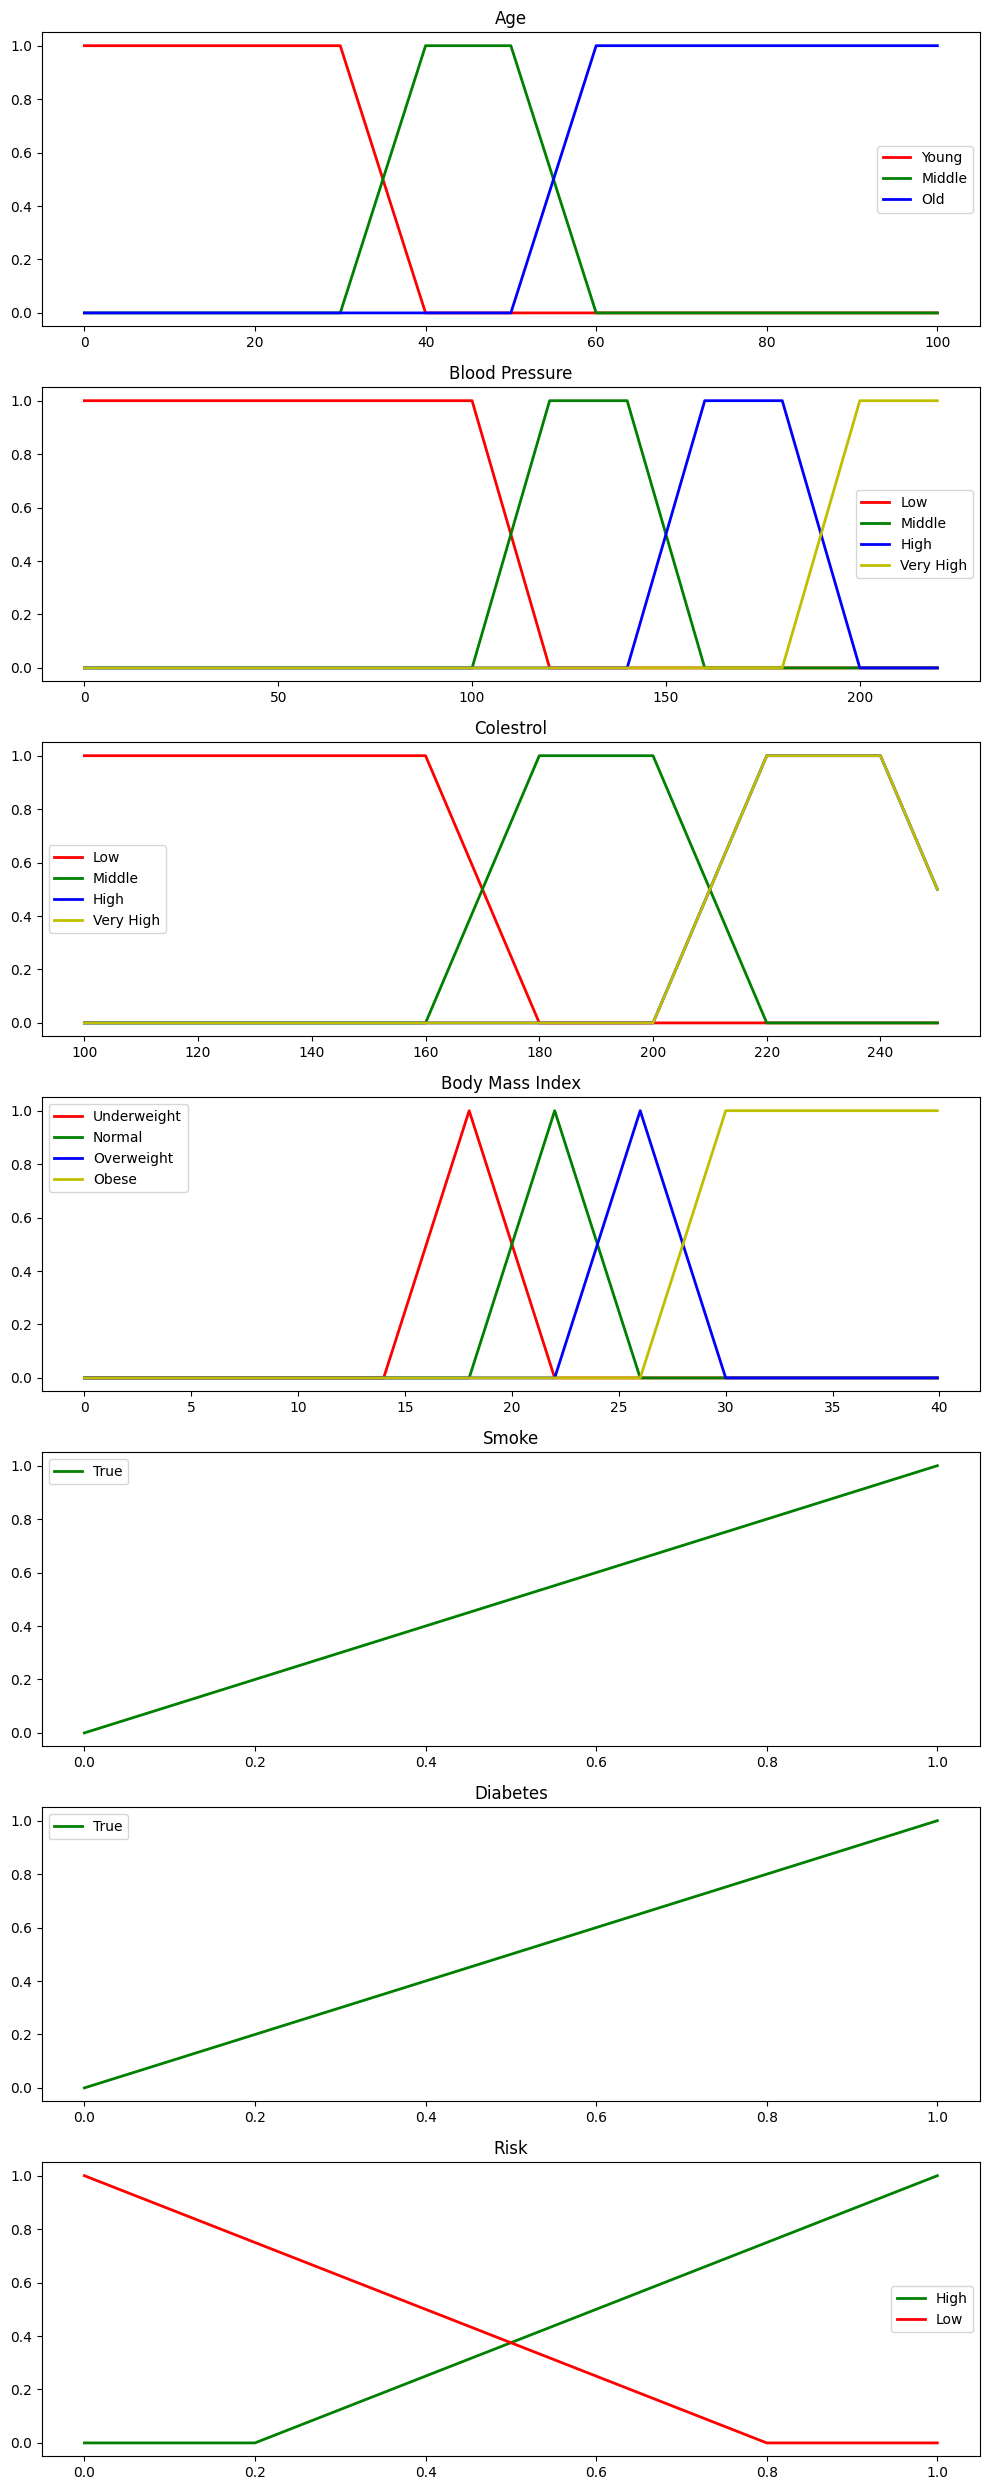

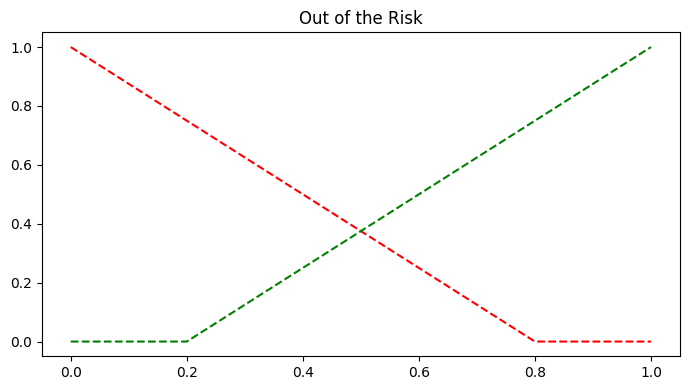

In [ ]:
# Variables

x_age = np.arange(0, 101, 1)
x_bloodPressure = np.arange(0, 221, 1)
x_cholesterol = np.arange(100, 251, 1)
x_bmi = np.arange(0, 40, 0.1)
x_smoking = np.linspace(0, 1, 101)
x_diabetes = np.linspace(0, 1, 101)
y_risk = np.linspace(0, 1, 101)

print("\n\n------------------------------------WELCOME-----------------------------------------\n\n")
print("Enter Health Data for Calculation of Risk of Heart Disease with Fuzzy Logic...\n\n")

input_age = int(input("Age: "))
input_bloodPressure = int(input("Blood Pressure: "))
input_cholesterol = int(input("Cholesterol: "))
input_bmi = float(input("BMI: "))
input_smoking = int(input("Smoking(Yes:1/No:0): "))
input_diabetes = int(input("Diabetes(Yes:1/No:0): "))

# Membership Functions
# Age
age_young = mf.trapmf(x_age, [-30, -5, 30, 40])
age_mid = mf.trapmf(x_age, [30, 40, 50, 60])
age_old = mf.trapmf(x_age, [50, 60, 100, 100])
# Blood Pressure
bloodPressure_low = mf.trapmf(x_bloodPressure, [-30, -5, 100, 120])
bloodPressure_mid = mf.trapmf(x_bloodPressure, [100, 120, 140, 160])
bloodPressure_high = mf.trapmf(x_bloodPressure, [140, 160, 180, 200])
bloodPressure_veryHigh = mf.trapmf(x_bloodPressure, [180, 200, 220, 220])
#Cholestrol
cholesterol_low = mf.trapmf(x_cholesterol, [-30, -5, 160, 180])
cholesterol_mid = mf.trapmf(x_cholesterol, [160, 180, 200, 220])
cholesterol_high = mf.trapmf(x_cholesterol, [200, 220, 240, 260])
cholesterol_veryHigh = mf.trapmf(x_cholesterol, [240, 260, 280, 280])
# BMI
bmi_underweight= mf.trimf(x_bmi, [14, 18, 22,])
bmi_normal= mf.trimf(x_bmi, [18, 22, 26,])
bmi_overweight= mf.trimf(x_bmi, [22, 26, 30,])
bmi_obese= mf.trapmf(x_bmi, [26, 30, 40, 40])
# Smoking
smoking_true = mf.trimf(x_smoking, [0, 1, 1])
smoking_false = mf.trimf(x_smoking, [0,0,0.5])
# Diabetes
diabetes_true =mf.trimf(x_diabetes, [0, 1, 1])
diabetes_false = mf.trimf(x_diabetes, [0,0,0.5])
#Output
risk_true = mf.trimf(y_risk, [0.2, 1, 1])
risk_false = mf.trimf(y_risk, [0,0,0.8])

# Chart
fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows = 7, figsize =(10, 25))

ax0.plot(x_age, age_young, 'r', linewidth = 2, label = 'Young')
ax0.plot(x_age, age_mid, 'g', linewidth = 2, label = 'Middle')
ax0.plot(x_age, age_old, 'b', linewidth = 2, label = 'Old')
ax0.set_title('Age')
ax0.legend()

ax1.plot(x_bloodPressure, bloodPressure_low, 'r', linewidth = 2, label = 'Low')
ax1.plot(x_bloodPressure, bloodPressure_mid, 'g', linewidth = 2, label = 'Middle')
ax1.plot(x_bloodPressure, bloodPressure_high, 'b', linewidth = 2, label = 'High')
ax1.plot(x_bloodPressure, bloodPressure_veryHigh, 'y', linewidth = 2, label = 'Very High')
ax1.set_title('Blood Pressure')
ax1.legend()

ax2.plot(x_cholesterol, cholesterol_low, 'r', linewidth = 2, label = 'Low')
ax2.plot(x_cholesterol, cholesterol_mid, 'g', linewidth = 2, label = 'Middle')
ax2.plot(x_cholesterol, cholesterol_high, 'b', linewidth = 2, label = 'High')
ax2.plot(x_cholesterol, cholesterol_high, 'y', linewidth = 2, label = 'Very High')
ax2.set_title('Colestrol')
ax2.legend()

ax3.plot(x_bmi, bmi_underweight, 'r', linewidth = 2, label = 'Underweight')
ax3.plot(x_bmi, bmi_normal, 'g', linewidth = 2, label = 'Normal')
ax3.plot(x_bmi, bmi_overweight, 'b', linewidth = 2, label = 'Overweight')
ax3.plot(x_bmi, bmi_obese, 'y', linewidth = 2, label = 'Obese')
ax3.set_title('Body Mass Index')
ax3.legend()

ax4.plot(x_smoking, smoking_true, 'g', linewidth = 2, label = 'True')
# ax4.plot(x_smoking, smoking_false, 'r', linewidth = 2, label = 'False')
ax4.set_title('Smoke')
ax4.legend()

ax5.plot(x_diabetes, diabetes_true, 'g', linewidth = 2, label = 'True')
# ax5.plot(x_diabetes, diabetes_false, 'r', linewidth = 2, label = 'False')
ax5.set_title('Diabetes')
ax5.legend()

ax6.plot(y_risk, risk_true, 'g', linewidth = 2, label = 'High')
ax6.plot(y_risk, risk_false, 'r', linewidth = 2, label = 'Low')
ax6.set_title('Risk')
ax6.legend()

plt.tight_layout()

# Membership Degree
#Age
age_fit_young = fuzz.interp_membership(x_age, age_young, input_age)
age_fit_mid = fuzz.interp_membership(x_age, age_mid, input_age)
age_fit_old = fuzz.interp_membership(x_age, age_old, input_age)
#BloodPressure
bloodPressure_fit_low = fuzz.interp_membership(x_bloodPressure, bloodPressure_low, input_bloodPressure)
bloodPressure_fit_mid = fuzz.interp_membership(x_bloodPressure, bloodPressure_mid, input_bloodPressure)
bloodPressure_fit_high = fuzz.interp_membership(x_bloodPressure,bloodPressure_high , input_bloodPressure)
bloodPressure_fit_veryHigh = fuzz.interp_membership(x_bloodPressure, bloodPressure_veryHigh, input_bloodPressure)
#Cholestrol
cholesterol_fit_low = fuzz.interp_membership(x_cholesterol, cholesterol_low, input_cholesterol)
cholesterol_fit_mid = fuzz.interp_membership(x_cholesterol, cholesterol_mid, input_cholesterol)
cholesterol_fit_high = fuzz.interp_membership(x_cholesterol, cholesterol_high, input_cholesterol)
cholesterol_fit_veryHigh = fuzz.interp_membership(x_cholesterol, cholesterol_veryHigh, input_cholesterol)
#BMI
bmi_fit_underweight = fuzz.interp_membership(x_bmi, bmi_underweight, input_bmi)
bmi_fit_normal = fuzz.interp_membership(x_bmi, bmi_normal, input_bmi)
bmi_fit_overweight = fuzz.interp_membership(x_bmi,bmi_overweight , input_bmi)
bmi_fit_obese = fuzz.interp_membership(x_bmi, bmi_obese, input_bmi)
#Smoke
smoking_fit_true = fuzz.interp_membership(x_smoking, smoking_true, input_smoking)
# smoking_fit_false = fuzz.interp_membership(x_smoking, smoking_false, input_smoking)
#Diabetes
diabetes_fit_true = fuzz.interp_membership(x_diabetes, diabetes_true, input_diabetes)
# diabetes_fit_false = fuzz.interp_membership(x_diabetes, diabetes_false, input_diabetes)

# RULES
 rule1 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young, bloodPressure_fit_low),cholesterol_fit_high),bmi_fit_normal),
  smoking_fit_true), risk_false)
  rule2 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_mid, bloodPressure_fit_mid),cholesterol_fit_mid),bmi_fit_underweight),
  smoking_fit_true),diabetes_fit_true), risk_true)
  rule3 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_old, bloodPressure_fit_veryHigh),cholesterol_fit_low),bmi_fit_overweight),
  smoking_fit_false), diabetes_fit_true), risk_true)
  rule4 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young, bloodPressure_fit_high),cholesterol_fit_veryHigh),bmi_fit_obese),
  smoking_fit_false), diabetes_fit_true), risk_true)
  rule5 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_mid, bloodPressure_fit_low),cholesterol_fit_high),bmi_fit_normal),
  smoking_fit_true),diabetes_fit_false), risk_false)
  rule6 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_old, bloodPressure_fit_mid),cholesterol_fit_low),bmi_fit_overweight),
  smoking_fit_false), diabetes_fit_false), risk_true)
  rule7 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young, bloodPressure_fit_veryHigh),cholesterol_fit_mid),bmi_fit_normal),
  smoking_fit_true), diabetes_fit_true), risk_true)
  rule8 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_mid, bloodPressure_fit_low),cholesterol_fit_veryHigh),bmi_fit_underweight),
  smoking_fit_false), diabetes_fit_false), risk_false)
  rule9 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_old, bloodPressure_fit_mid),cholesterol_fit_high),bmi_fit_obese),
  smoking_fit_false), diabetes_fit_true), risk_true)
  rule10 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young, bloodPressure_fit_high),cholesterol_fit_low),bmi_fit_overweight),
  smoking_fit_true), diabetes_fit_true), risk_true)
  rule11 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_mid, bloodPressure_fit_low),cholesterol_fit_high),bmi_fit_normal),
  smoking_fit_false), diabetes_fit_true), risk_false)
  rule12 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_old, bloodPressure_fit_veryHigh),cholesterol_fit_mid),bmi_fit_obese),
  smoking_fit_false), diabetes_fit_true), risk_true)
  rule13 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young, bloodPressure_fit_mid),cholesterol_fit_veryHigh),bmi_fit_underweight),
  smoking_fit_true), diabetes_fit_false), risk_false)
  rule14 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_mid, bloodPressure_fit_high),cholesterol_fit_low),bmi_fit_normal),
  smoking_fit_true), diabetes_fit_false), risk_false)
  rule15 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_old, bloodPressure_fit_low),cholesterol_fit_high),bmi_fit_overweight),
  smoking_fit_false), diabetes_fit_false), risk_true)
  rule16 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young, bloodPressure_fit_low),cholesterol_fit_low),bmi_fit_obese),
  smoking_fit_false), diabetes_fit_true), risk_true)
  rule17 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_mid, bloodPressure_fit_mid),cholesterol_fit_high),bmi_fit_normal),
  smoking_fit_false), diabetes_fit_true), risk_true)
  rule18 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_old, bloodPressure_fit_veryHigh),cholesterol_fit_veryHigh),bmi_fit_overweight),
  smoking_fit_false), diabetes_fit_false), risk_true)
  rule19 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young, bloodPressure_fit_high),cholesterol_fit_mid),bmi_fit_underweight),
  smoking_fit_true), diabetes_fit_true), risk_true)
  rule20 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_mid, bloodPressure_fit_low),cholesterol_fit_low),bmi_fit_normal),
  smoking_fit_false),diabetes_fit_false), risk_false)
  rule21 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_old, bloodPressure_fit_mid),cholesterol_fit_high),bmi_fit_overweight),
  smoking_fit_false), diabetes_fit_true), risk_true)
  rule22 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young, bloodPressure_fit_veryHigh),cholesterol_fit_veryHigh),bmi_fit_obese),
  smoking_fit_true), diabetes_fit_true), risk_true)
  rule23 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_mid, bloodPressure_fit_low),cholesterol_fit_mid),bmi_fit_underweight),
  smoking_fit_true), diabetes_fit_false), risk_false)
  rule24 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_old, bloodPressure_fit_high),cholesterol_fit_low),bmi_fit_normal),
  smoking_fit_false), diabetes_fit_true), risk_false)
# Combination sets > Mamdani
out_true = np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(rule2,rule3),rule4),rule6),rule7),rule9),rule10),rule12),rule15),rule16),rule17),rule18),rule19),rule21),rule22)
out_false = np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(rule1,rule5),rule8),rule11),rule13),rule14),rule20),rule23),rule24)

# Chart
risk0 = np.zeros_like(y_risk)

fig, ax0 = plt.subplots(figsize = (7, 4))
ax0.fill_between(y_risk, risk0, out_false, facecolor = 'r', alpha = 0.7)
ax0.plot(y_risk, risk_false, 'r', linestyle = '--')
ax0.fill_between(y_risk, risk0, out_true, facecolor = 'g', alpha = 0.7)
ax0.plot(y_risk, risk_true, 'g', linestyle = '--')
ax0.set_title('Out of the Risk')

plt.tight_layout()

# CoA

out_risk = np.fmax(out_true, out_false)
defuzzified  = fuzz.defuzz(y_risk, out_risk, 'centroid')

result = fuzz.interp_membership(y_risk, out_risk, defuzzified)

if defuzzified >= 0.5:
  value=1

else :
  value=0

print("Heart Risk Attack:", defuzzified*100, "percent")

# Chart

# fig, ax0 = plt.subplots(figsize=(7, 4))

# ax0.plot(y_risk, risk_true, 'y', linewidth = 0.5, linestyle = '--')
# ax0.plot(y_risk, risk_false, 'm', linewidth = 0.5, linestyle = '--')

# ax0.fill_between(y_risk, risk0, out_risk, facecolor = 'Orange', alpha = 0.7)
# ax0.plot([defuzzified , defuzzified], [0, result], 'k', linewidth = 1.5, alpha = 0.9)
# ax0.set_title('Centroid Deffuzification')

# plt.tight_layout()


